In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Verify that the drive is mounted
!ls /content/drive/MyDrive/Aly6040-week-2-assignment2

kc_house_data.csv


In [5]:
file_path = '/content/drive/MyDrive/Aly6040-week-2-assignment2/kc_house_data.csv'

In [6]:
# Load the dataset
df = pd.read_csv(file_path)

In [7]:
# 2. Data Cleaning and Preprocessing
# Display basic information about the dataset
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  floa

In [8]:
# Convert 'date' to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Extract year and month from 'date' (potentially useful features)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [10]:
# Drop the original 'date' and 'id' columns
df = df.drop(['date', 'id'], axis=1)

In [11]:
# Handle zipcode as a categorical variable
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)


In [12]:
# 3. Feature Selection
# Features for the investor persona
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'year', 'month'] + [col for col in df.columns if 'zipcode_' in col]

In [30]:
# 3. Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis:")
print(df.describe())


Exploratory Data Analysis:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989    

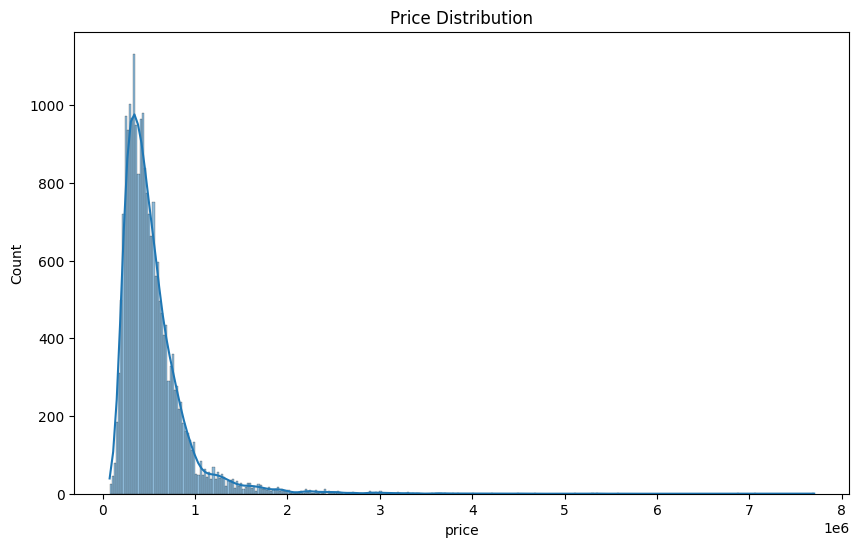

In [31]:
# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


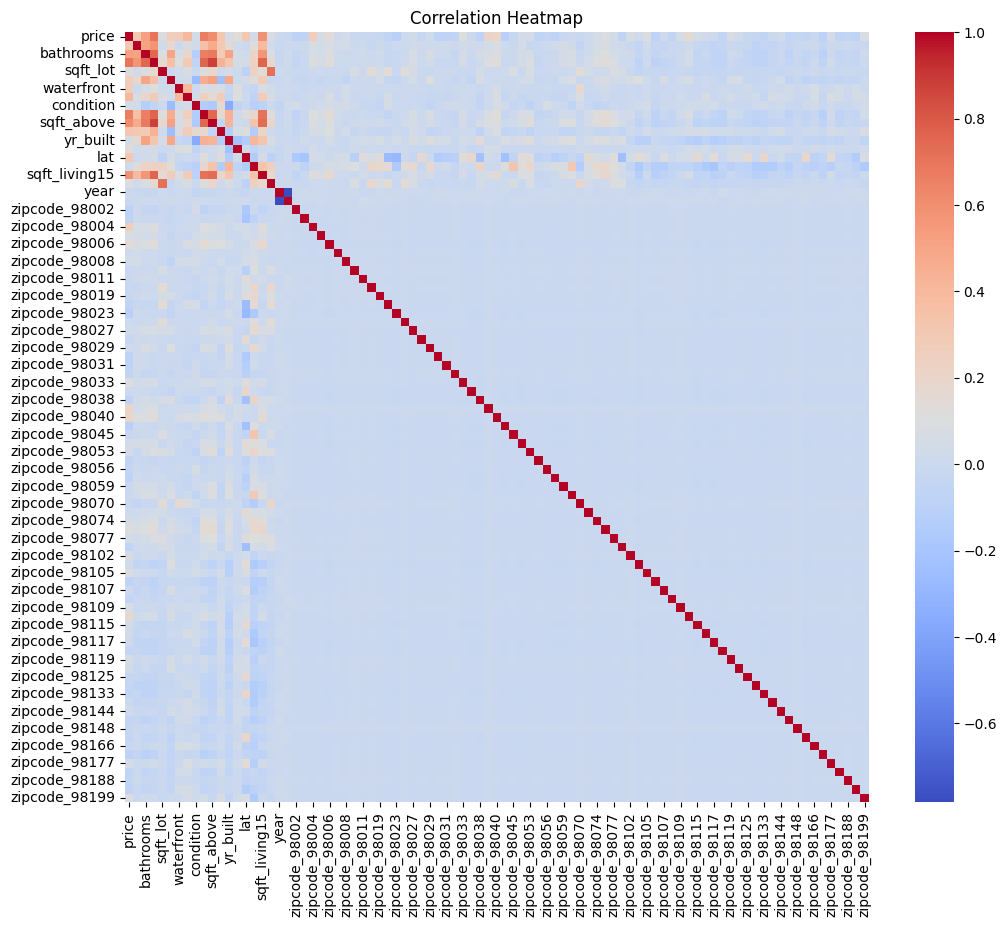

In [32]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

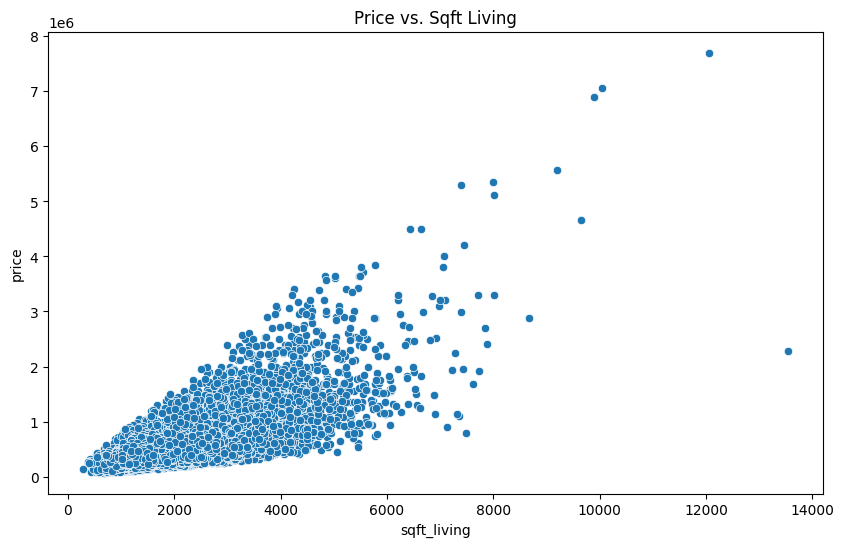

In [33]:
# Scatter plot of price vs. sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Sqft Living')
plt.show()

In [13]:
# 4. Data Preprocessing
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

In [14]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df['price']

In [15]:
# 5. Model Building and Evaluation

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Linear Regression
print("\nLinear Regression Model:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print(f"RMSE: {lr_rmse}")
print(f"R-squared: {lr_r2}")


Linear Regression Model:
RMSE: 170392.89642310902
R-squared: 0.80794833597038


In [17]:
# c) Random Forest (as an improvement over Decision Tree)
print("\nRandom Forest Model:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RMSE: {rf_rmse}")
print(f"R-squared: {rf_r2}")


Random Forest Model:
RMSE: 178440.78318637068
R-squared: 0.789378187759066


In [18]:
# 6. Feature Importance

# a) Linear Regression Feature Importance
# Linear Regression Feature Importance
lr_coefficients = lr_model.coef_
lr_feature_importance = {}

# Group zipcode features and sum their coefficients
zipcode_importance = 0
for i, feature in enumerate(features):
    if 'zipcode_' in feature:
        zipcode_importance += lr_coefficients[i]
    else:
        lr_feature_importance[feature] = lr_coefficients[i]

lr_feature_importance['zipcodes'] = zipcode_importance


In [19]:
# Sort features by absolute coefficient value
sorted_features_lr = sorted(lr_feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)


In [20]:
# Separate features and their importances
feature_names_lr, importance_values_lr = zip(*sorted_features_lr)

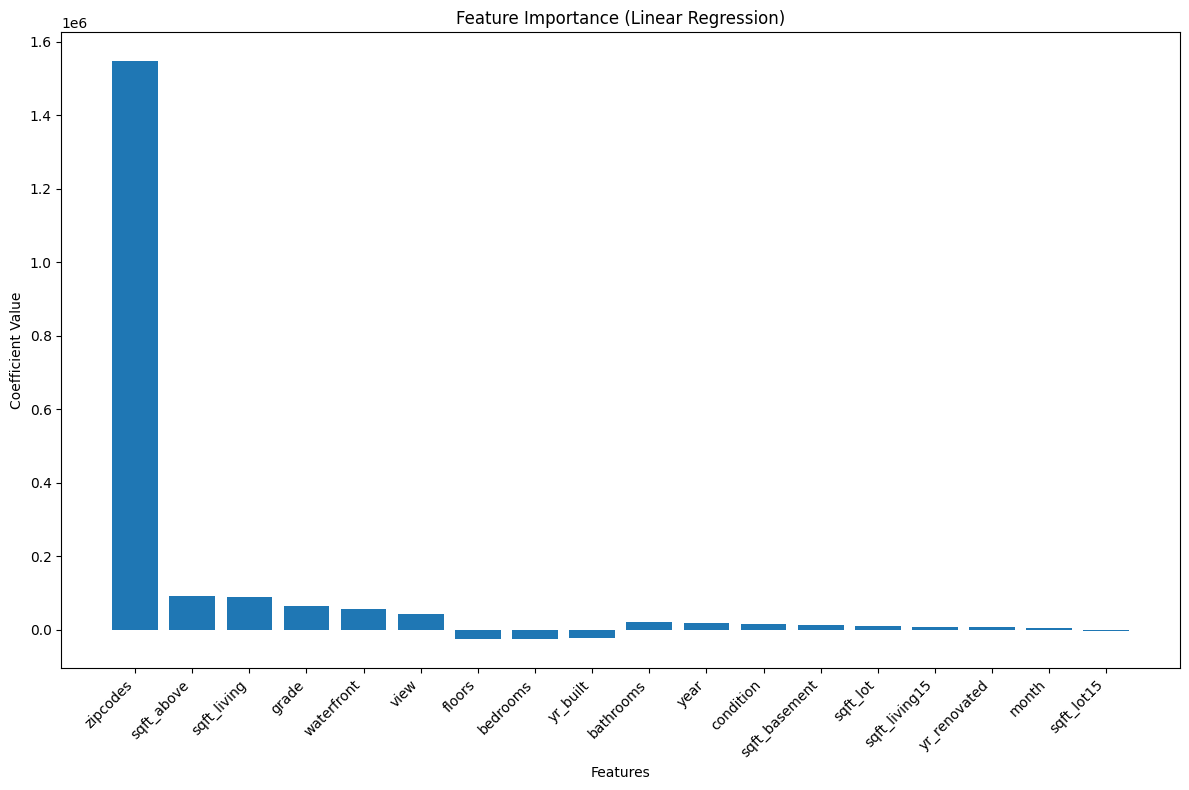


Feature Importances (Linear Regression):
zipcodes: 1547420.7759
sqft_above: 91632.3590
sqft_living: 89038.1092
grade: 66125.3000
waterfront: 55744.6262
view: 42427.9334
floors: -25398.8393
bedrooms: -24794.2131
yr_built: -21992.3462
bathrooms: 21079.1339
year: 18243.9584
condition: 16549.8511
sqft_basement: 13322.7374
sqft_lot: 9787.3676
sqft_living15: 7382.2794
yr_renovated: 7376.5444
month: 5190.2216
sqft_lot15: -2838.7977


In [21]:
# Plot feature importance for Linear Regression
plt.figure(figsize=(12, 8))
plt.bar(feature_names_lr, importance_values_lr)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

print("\nFeature Importances (Linear Regression):")
for feature, imp in sorted_features_lr:
    print(f"{feature}: {imp:.4f}")

In [22]:
# b) Random Forest Feature Importance
importance = rf_model.feature_importances_
feature_importance_rf = {}

# Group zipcode features and sum their importances
zipcode_importance = 0
for i, feature in enumerate(features):
    if 'zipcode_' in feature:
        zipcode_importance += importance[i]
    else:
        feature_importance_rf[feature] = importance[i]

feature_importance_rf['zipcodes'] = zipcode_importance

In [23]:
# Sort features by importance
sorted_features_rf = sorted(feature_importance_rf.items(), key=lambda x: x[1], reverse=True)

In [24]:
# Separate features and their importances
feature_names_rf, importance_values_rf = zip(*sorted_features_rf)

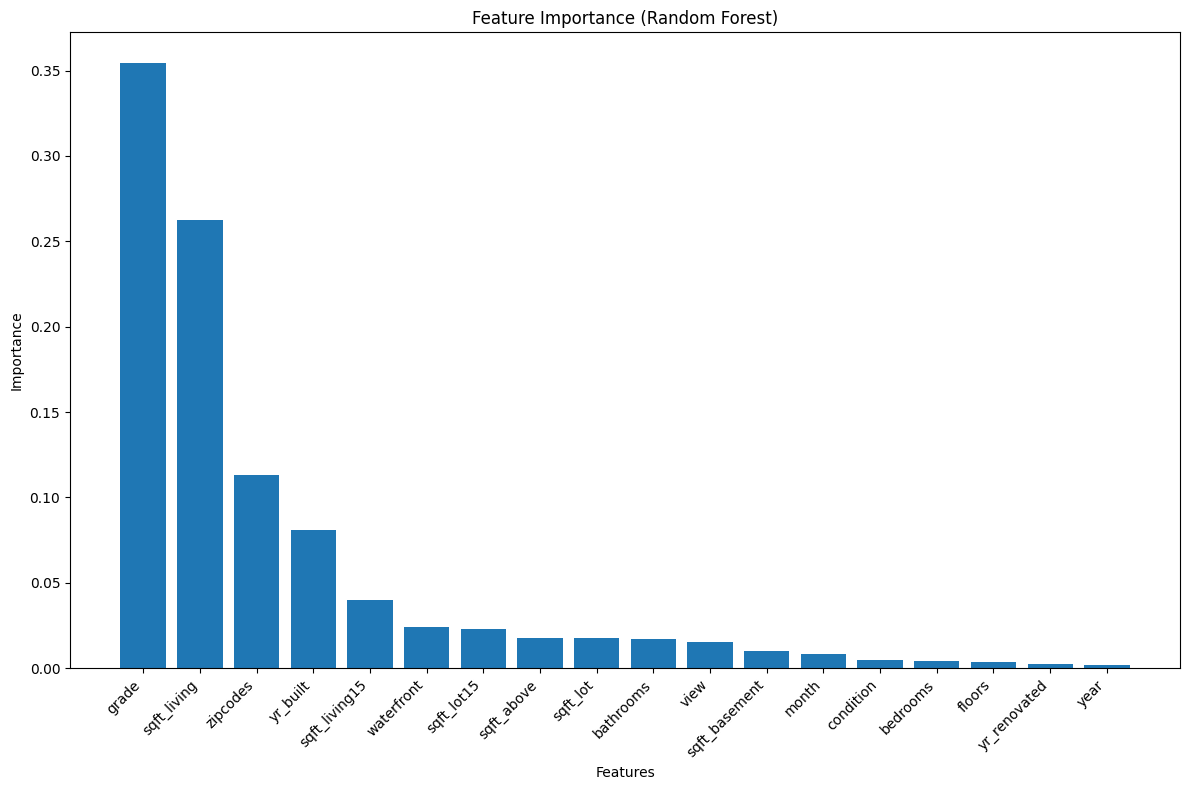


Feature Importances (Random Forest):
grade: 0.3547
sqft_living: 0.2625
zipcodes: 0.1130
yr_built: 0.0808
sqft_living15: 0.0400
waterfront: 0.0239
sqft_lot15: 0.0228
sqft_above: 0.0179
sqft_lot: 0.0176
bathrooms: 0.0168
view: 0.0155
sqft_basement: 0.0101
month: 0.0081
condition: 0.0045
bedrooms: 0.0040
floors: 0.0037
yr_renovated: 0.0023
year: 0.0016


In [25]:
# Plot feature importance for Random Forest
plt.figure(figsize=(12, 8))
plt.bar(feature_names_rf, importance_values_rf)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importances (Random Forest):")
for feature, imp in sorted_features_rf:
    print(f"{feature}: {imp:.4f}")

In [27]:
# 7. Cross-Validation (for Random Forest)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')



In [28]:
print("\nCross-Validation Results (R-squared):")
print(cv_scores)
print(f"Mean R-squared: {cv_scores.mean()}")


Cross-Validation Results (R-squared):
[0.78814852 0.83530076 0.83875671 0.85064379 0.84783796]
Mean R-squared: 0.832137546776192


In [29]:
# 8. Hypothesis Testing (Illustrative Example - Simplified)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

print("\nCoefficients from Statsmodels:")
print(results.summary())


Coefficients from Statsmodels:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     861.6
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:02:15   Log-Likelihood:            -2.3146e+05
No. Observations:               17290   AIC:                         4.631e+05
Df Residuals:                   17204   BIC:                         4.638e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.396e+0